In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline


In [2]:
# Excercise 13

np.random.seed(1)

# 13 (a)
# N(0, 1)
# N(mu, sigma^2)

sigma = 1
mu = 0
x = sigma * np.random.randn(100) + mu

# 13 (b)
# N(0, 0.25)
# N(mu, sigma^2)

sigma = 0.5
mu = 0
eps = sigma * np.random.randn(100) + mu

# 13 (c)
B_0 = -1
B_1 = 0.5

y = -1 + 0.5 * x + eps

# B_0 = -1
# B_1 = 0.5
# Vector len = 100

# 13 (d)
np.linalg.norm(y), len(y)

(11.173260452749581, 100)

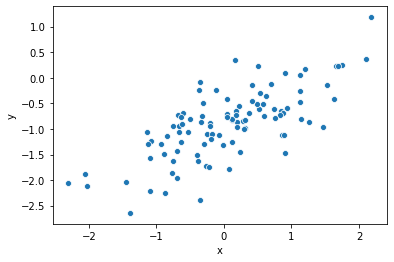

In [3]:
# 13 (d)
ax = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y');

In [4]:
pd.DataFrame({'x':x, 'y': y}).corr()

,x,y
x,1.000000,0.722384
y,0.722384,1.000000


In [5]:
# 13 (e)

model = sm.OLS.from_formula('y ~ x', data=pd.DataFrame({'x':x, 'y': y})).fit()
model_base = model
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           2.20e-17
Time:                        12:24:37   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9265      0.047    -19.717      0.000      -1.020      -0.833
x              0.5477      0.053     10.342      0.000       0.443       0.653
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
B_0 = -0.9265
b_1 = 0.4502

# The model estimates parameters close to the true values. 

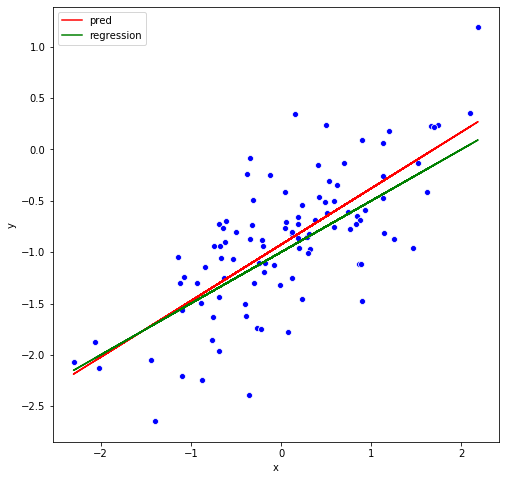

In [7]:
# 13 (f)

plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=x, y=y, color='b')
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, model.predict(), color='r')
ax.plot(x, -1+(0.5*x), color='g')
ax.legend(['pred', 'regression']);

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           2.83e-16
Time:                        12:24:38   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9325      0.058    -16.158      0.000      -1.047      -0.818
x                0.5468      0.053     10.229      0.000       0.441       0.653
np.square(x)     0.0077      0.043      0.181      0.856      -0.077       0.092
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

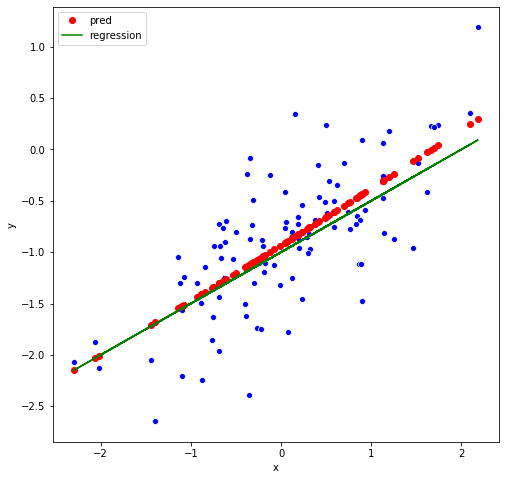

In [8]:
# 13 (g)

model = smf.ols(formula='y ~ x + np.square(x)', data=pd.DataFrame({'x':x, 'y': y})).fit()
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=x, y=y, color='b')
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, model.predict(), 'ro')
ax.plot(x, -1+(0.5*x), color='g')
ax.legend(['pred', 'regression']);
model.summary()



The model selects a small coefficient for the quadratic variable and so the fit of our model is only slightly affected. The p-value > 0.05 for this variable suggests that it is not statistically significant in representing our data. The R-squared value is identical for both models suggesting that the quadratic model hasn't reduced the error of our model in fitting the data.

Overall the quadratic term x does not seem to have improved our model.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     2525.
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           9.12e-72
Time:                        12:33:31   Log-Likelihood:                 84.594
No. Observations:                 100   AIC:                            -165.2
Df Residuals:                      98   BIC:                            -160.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9880      0.011    -94.008      0.0

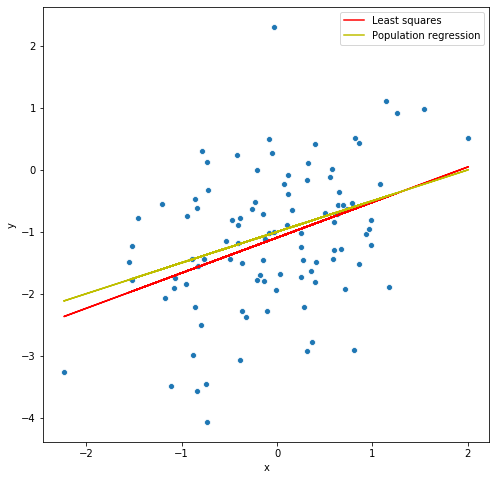

In [38]:
# 13 (h)
sigma = 1
mu = 0
x = sigma * np.random.randn(100) + mu

# 13 (b)
# N(0, 0.25)
# N(mu, sigma^2)

sigma = 0.5 # sigma model_base
mu = 0
eps = sigma * np.random.randn(100) + mu

# 13 (c)
B_0 = -1
B_1 = 0.5

y = -1 + 0.5 * x + eps

model = sm.OLS.from_formula('y ~ x', data=pd.DataFrame({'x':x, 'y': y})).fit()
model_base = model
model.summary()

# prepare x]/.j,
sigma = 1
mu = 0
x = sigma * np.random.randn(100) + mu

# prepare eps
sigma = 0.1 # sigma model_less
mu = 0 # eps
eps = sigma * np.random.randn(100) + mu

# calc y
y = -1 + 0.5 * x + eps

# LR
model = smf.ols(formula='y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()
model_less = model
print(model.summary())


# prepare x
sigma = 0.8
mu = 0
x = sigma * np.random.randn(100) + mu

# prepare eps
sigma = 1 # sigma model_more
mu = 0
eps = sigma * np.random.randn(100) + mu

# calc y
y = -1 + 0.5 * x + eps

# LR
model = smf.ols(formula='y ~ x', data=pd.DataFrame({'x':x, 'y': y})).fit()
model_more = model
print(model.summary())


# plot
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, model.predict(), color='r')
ax.plot(x, -1+(0.5*x), color='y')
ax.legend(['Least squares', 'Population regression']);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     10.87
Date:                Fri, 06 Dec 2019   Prob (F-statistic):            0.00136
Time:                        12:30:25   Log-Likelihood:                -138.68
No. Observations:                 100   AIC:                             281.4
Df Residuals:                      98   BIC:                             286.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0105      0.098    -10.309      0.0

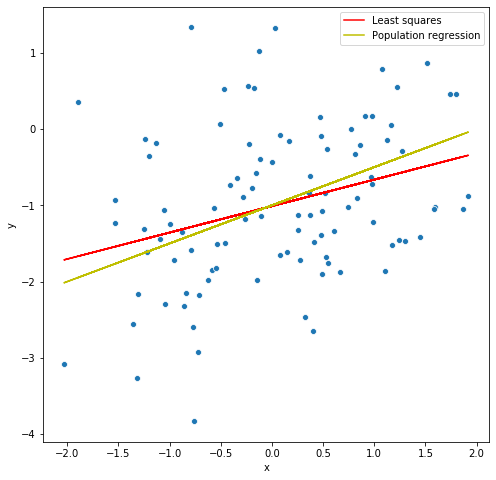

In [27]:
# 13 (i)


# prepare x
sigma = 1
mu = 0
x = sigma * np.random.randn(100) + mu

# prepare eps
sigma = 1
mu = 0
eps = sigma * np.random.randn(100) + mu

# calc y
y = -1 + 0.5 * x + eps

# LR
model = smf.ols(formula='y ~ x', data=pd.DataFrame({'x':x, 'y': y})).fit()
model_more = model
print(model.summary())

# plot
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, model.predict(), color='r')
ax.plot(x, -1+(0.5*x), color='y')
ax.legend(['Least squares', 'Population regression']);


In [39]:
# 13 (j)

# Confidence interval - with 95% change values are in 

model_base.conf_int()

,0,1
Intercept,-1.116451,-0.903364
x,0.366106,0.578137


In [24]:
model_less.conf_int()

,0,1
Intercept,-1.001042,-0.996886
x,0.499732,0.503356


In [25]:
model_more.conf_int()

,0,1
Intercept,-1.279440,-0.886506
x,0.115793,0.541931
